In [53]:
# Import needed libraries
#import cugraph
#import cudf
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Construct Knodel graph from edgelist
#edgelist_path='../data/knodel_edgelist.csv'
edgelist_path='../build/exported-knodel-graph.txt'

In [55]:
df = cudf.read_csv(edgelist_path, delimeter=',', dtype=['int32', 'int32'], header=None)
G = cugraph.Graph()
G = cugraph.from_edgelist(df, source='0', destination='1', edge_attr=None)

NameError: name 'cudf' is not defined

In [56]:
# Start basic experimentation

True

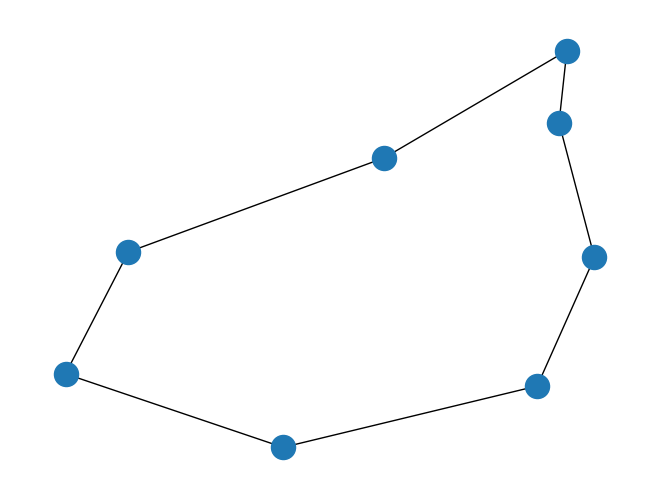

In [73]:
# Knodel graph should be bipartite
G = nx.read_edgelist(edgelist_path)
nx.draw(G)
nx.is_bipartite(G)

In [74]:
# Draw graph to check its structure
G = nx.read_edgelist(edgelist_path)

partition0=[10, 11, 12, 13] #, 14, 15, 16, 17, 18]
partition1=[20, 21, 22, 23] #, 24, 25, 26, 27, 28]

aux = G.edges(data=True)
B = nx.Graph()
B.add_nodes_from(list(partition0), bipartite=0)
B.add_nodes_from(list(partition1), bipartite=1)
B.add_edges_from(aux)

plt.figure()

edges = B.edges()
print(edges)
X, Y = nx.bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(B, pos=pos, edges=edges)
plt.show()

[('10', '20'), ('10', '21'), ('20', '13'), ('21', '11'), ('13', '23'), ('11', '22'), ('22', '12'), ('12', '23')]


AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

<Figure size 640x480 with 0 Axes>

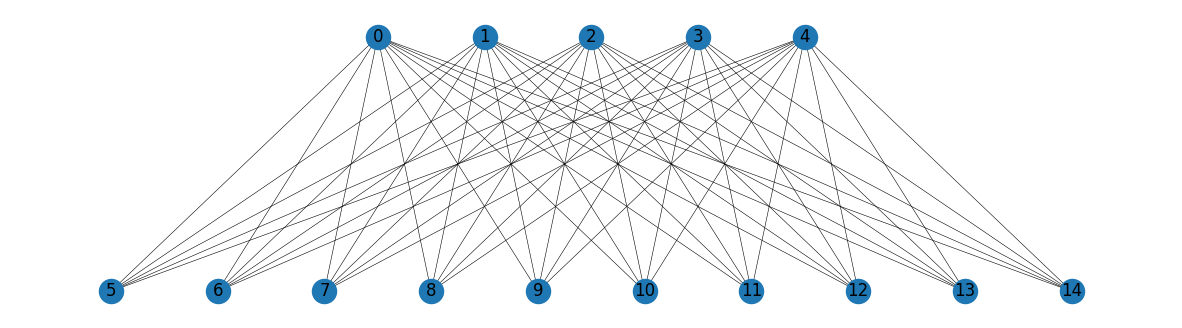

In [26]:
import networkx as nx


m, n = 5, 10
K = nx.complete_bipartite_graph(m, n)
pos = {}
pos.update((i, (i - m/2, 1)) for i in range(m))
pos.update((i, (i - m - n/2, 0)) for i in range(m, m + n))

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nx.draw(K, with_labels=True, pos=pos, node_size=300, width=0.4)
plt.show()
